<a href="https://colab.research.google.com/github/yuvarajmahajan/Cardiovascular-Risk-Prediction/blob/main/Capstone_Project_Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cardiovascular Risk Prediction Project**

### **From the plot, we can see that the classes are almost balanced and we are good to proceed with data processing.**

**The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.**

# **Data Description :**

**Variables :**

**Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.**

**Demographic:**

• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)

**Behavioral :**

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.) 

**Medical( history)**


• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)

**Medical(current)**

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

**•Predict variable (desired target)**

10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
Dv 

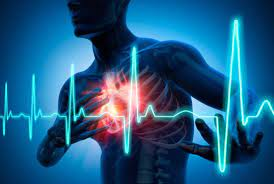

# **Importing essential libraries**

In [1]:
#import required packages and libraries
import pandas as pd      
import numpy as np                  
import matplotlib.pyplot as plt    
import seaborn as sns               
import missingno as mno             
import warnings                     
warnings.filterwarnings('ignore')
from scipy import stats             
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
from statsmodels.stats.outliers_influence import variance_inflation_factor
import os

In [2]:
#set style for graph
sns.set_style(style='darkgrid')

# Setting fontsizes,fontweight,label weight for labels,titles.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

## **Mounting Drive**

In [3]:
#Mounting Drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Loading data set of csv file
df=pd.read_csv('/content/drive/MyDrive/data_cardiovascular_risk.csv')

# **Data Summary**

- Size of the dataset.
- Printing few rows of it.
- What type of feature in our dataset.

In [5]:
#To view the dataset 
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [6]:
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [7]:
#Shape of the dataset
df.shape

(3390, 17)

In [8]:
#To get the columns of the dataset
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [9]:
# number of unique values that each column contains
df.nunique()

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

In [10]:
#showing the datatype of all features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [11]:
#Summary of the dataset
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


# **Data Cleaning**

In [12]:
df.drop("id",axis=1,inplace=True)
df.drop_duplicates(inplace=True)

In [13]:

#Checking of Missing value
df.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

## **Comment :- There are misisng values present in the features such as education,cigsPerDay, BPMeds, totChol, BMI,heartRate & glucose.**

In [14]:
# To remove the missing values-
df.dropna(axis=0,inplace=True)
df.shape

(2927, 16)

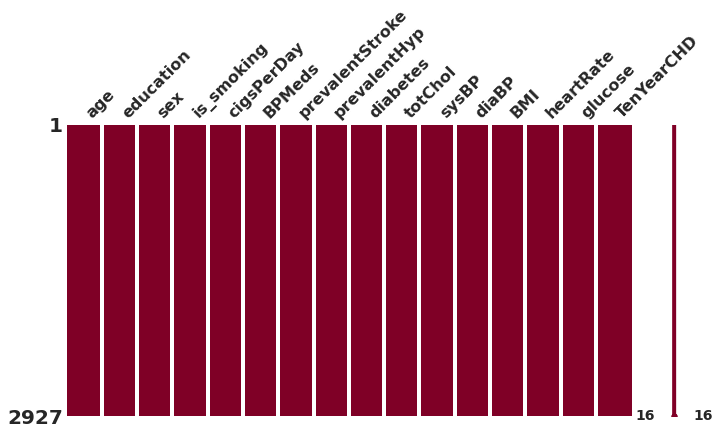

In [15]:
#Visualization of NAN values in the dataset-
mno.matrix(df,figsize=(10,5),color=(0.5,0.0,0.15))


*  Visualization of all NAN vaules in the given cardivascular Dataset




### Analysing the 'target' variable

In [16]:
df["TenYearCHD"].describe()

count    2927.000000
mean        0.151691
std         0.358783
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: TenYearCHD, dtype: float64

In [17]:
df.TenYearCHD.value_counts()

0    2483
1     444
Name: TenYearCHD, dtype: int64

In [18]:
df["TenYearCHD"].unique()

array([0, 1])

## **This shows that our Target variable is classified in "0" and "1" category which implies that we have to perform Classification model for our dataset to analyse and interpret the dataset.**


## **Data Visualization**

**Seprate dependent and independent variables**

In [19]:
dependent_variable = 'TenYearCHD'

In [ ]:
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})
independent_variables

['prevalentStroke',
 'BPMeds',
 'is_smoking',
 'prevalentHyp',
 'BMI',
 'education',
 'glucose',
 'totChol',
 'cigsPerDay',
 'diabetes',
 'sex',
 'diaBP',
 'age',
 'sysBP',
 'heartRate']

In [20]:
# Divide the columns based on the type for clear management
col_Demographic = [ 'age', 'education', 'sex']

col_Behavioral = ['is_smoking', 'cigsPerDay']

col_medical_history = ['BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']

col_medical_current = ['totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

col_target = ['TenYearCHD']

In [21]:
independent_vars = df[col_Demographic + col_Behavioral + col_medical_history + col_medical_current]
dependent_vars = df[col_target]

In [22]:
independent_vars.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000
mean,49.507345,1.965494,9.112743,0.030065,0.006150,0.314315,0.026990,237.129142,132.626409,82.906218,25.797041,75.888282,81.934404,237.129142,132.626409,82.906218,25.797041,75.888282,81.934404
std,8.597191,1.017199,11.882784,0.170795,0.078192,0.464322,0.162082,44.613282,22.326197,12.078873,4.130376,11.971207,24.106943,44.613282,22.326197,12.078873,4.130376,11.971207,24.106943
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.960000,45.000000,40.000000,113.000000,83.500000,48.000000,15.960000,45.000000,40.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,74.500000,23.030000,68.000000,71.000000,206.000000,117.000000,74.500000,23.030000,68.000000,71.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.500000,82.000000,25.380000,75.000000,78.000000,234.000000,128.500000,82.000000,25.380000,75.000000,78.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.040000,83.000000,87.000000,264.000000,144.000000,90.000000,28.040000,83.000000,87.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000


In [23]:
dependent_vars.describe()

,TenYearCHD
count,2927.000000
mean,0.151691
std,0.358783
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


**Hitogram for all the features to understand the distribution**

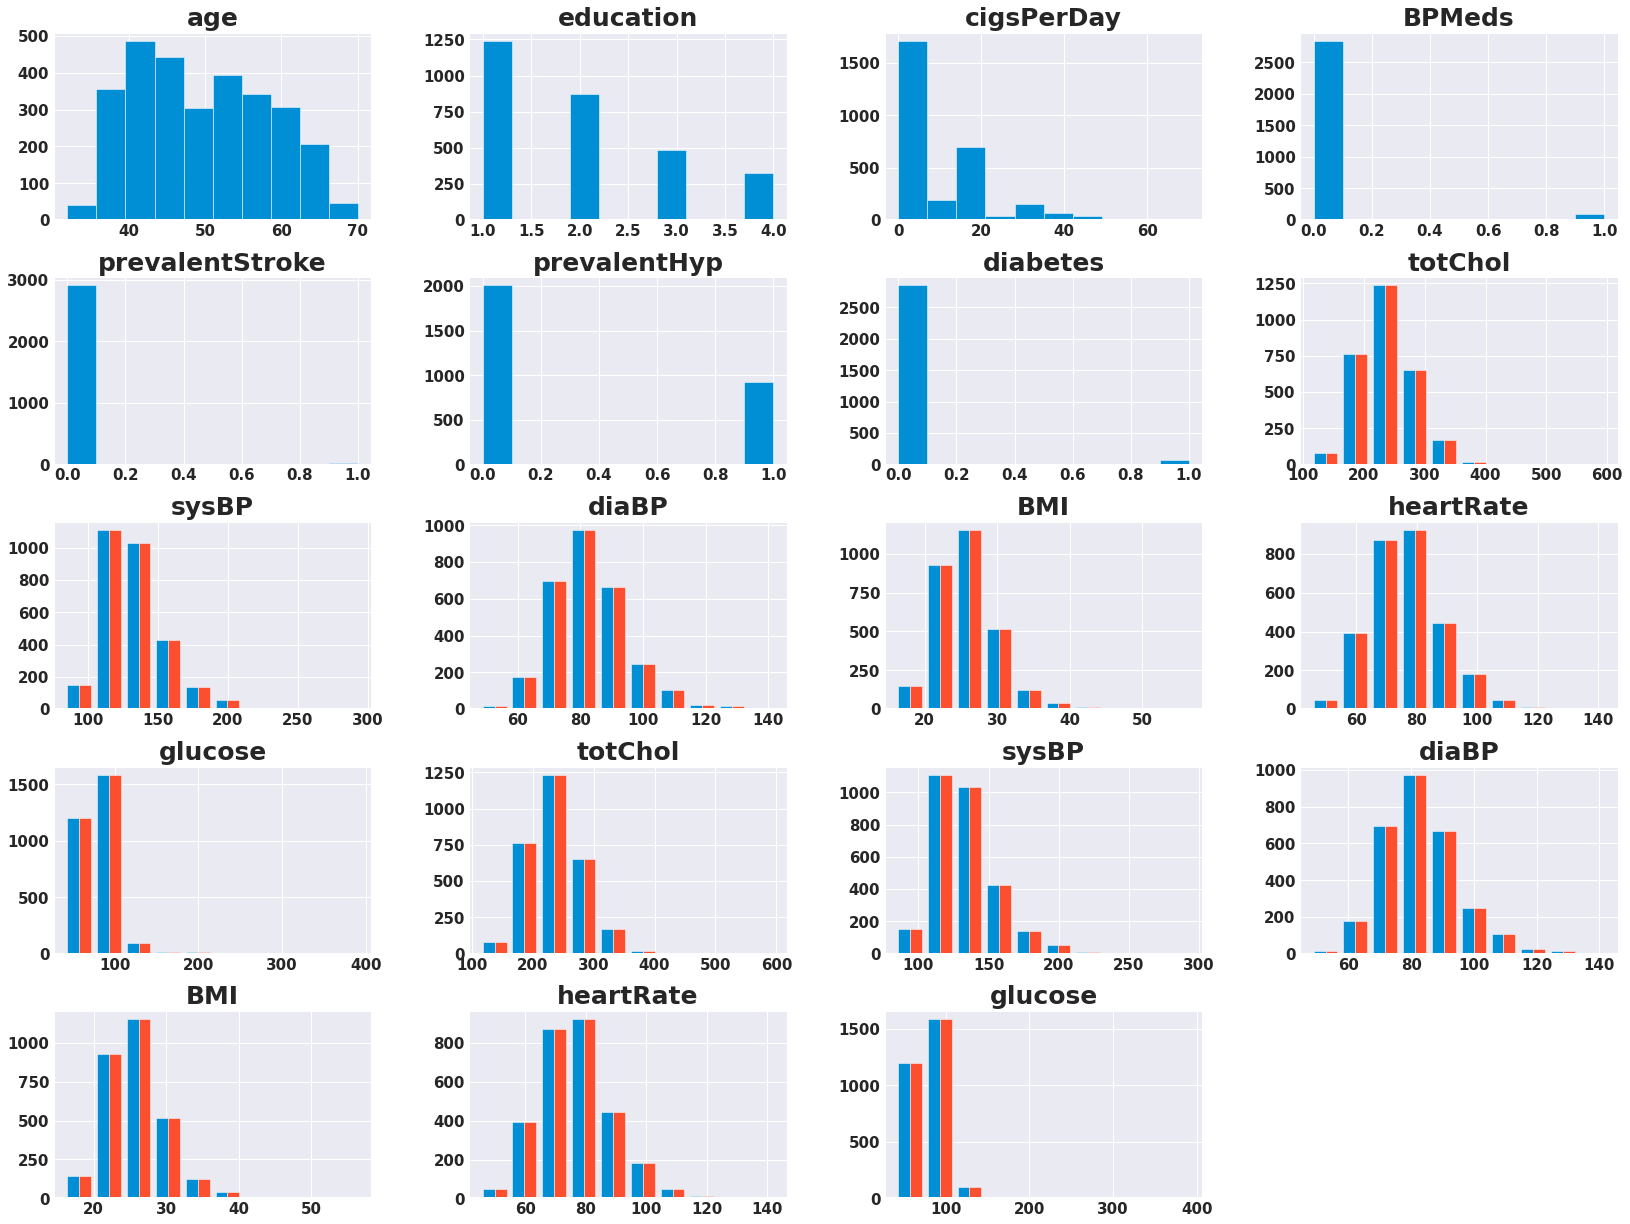

In [24]:
independent_vars.hist(figsize= (25,20))
plt.show()

**Inference**


*   Here we can see the different type of result of different columns such as age, education, Cigsperday, BPmeds, prevelentstrock, HYP, Diabetes, totchol,SysBP, DiaBP, BMI, HeartRate, Glucose.

*  Histogram analyze all the values of columns   



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f77ce654a90>]],
      dtype=object)

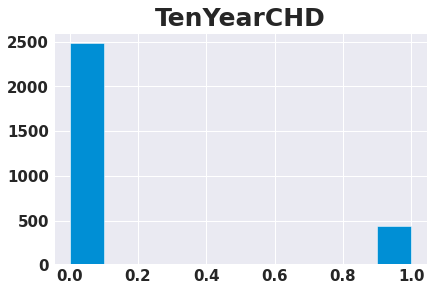

In [25]:
dependent_vars.hist()

* Let’s take a look at the plots. It shows how each feature and label is distributed along different ranges, which further confirms the need for scaling. Next, wherever you see discrete bars, it basically means that each of these is actually a categorical variable. We will need to handle these categorical variables before applying Machine Learning. Our target labels have two classes, 0 for no disease and 1 for disease.

## **Outliers**

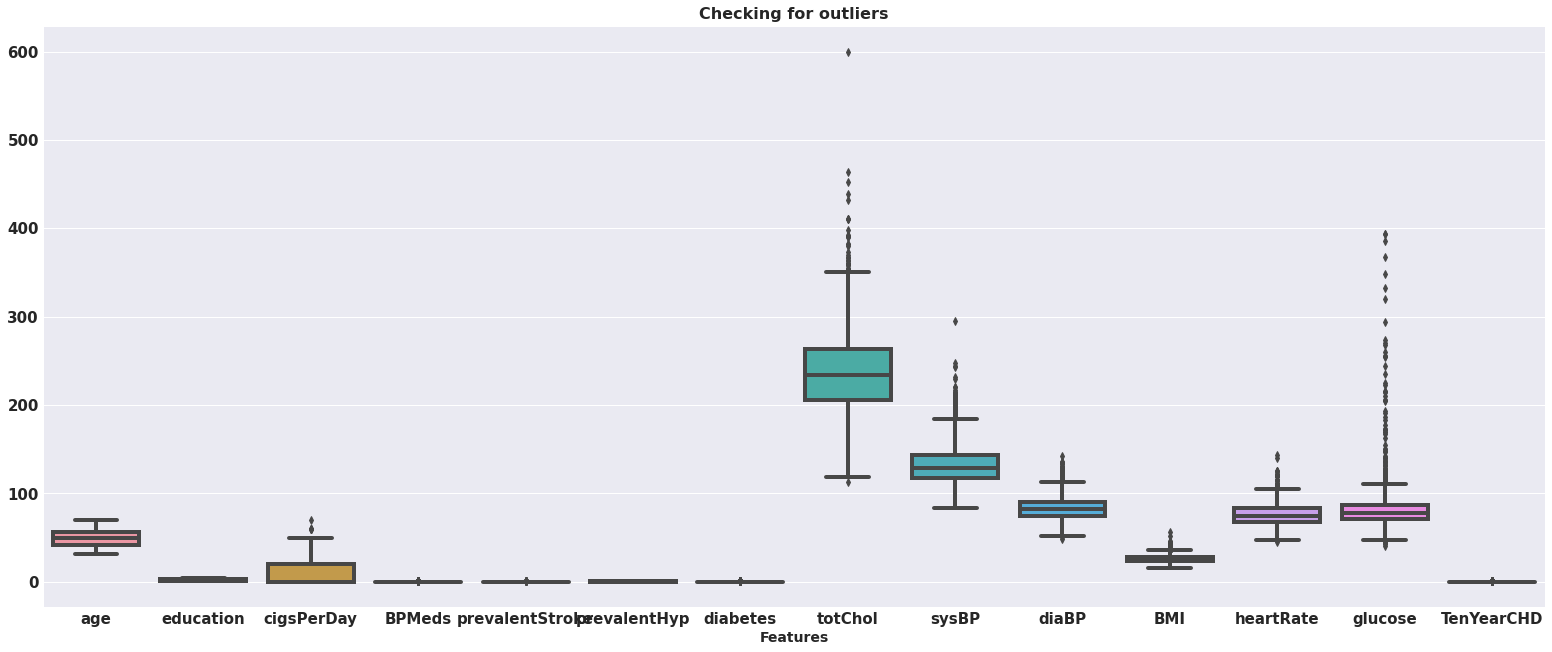

In [26]:
# Checking for Outliers
plt.figure(figsize=(24,10))
sns.boxplot(data=df)
plt.title('Checking for outliers', size=16)
plt.xlabel('Features',size=14)
plt.show()

## **Visualization on Dependent and Independent Variables**

**Predict variable (desired target)**

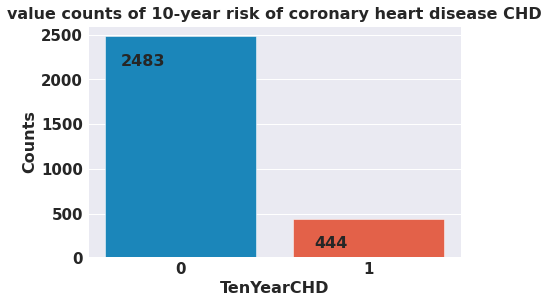

In [27]:
# value counts of 10-year risk of coronary heart disease CHD
plt.figure(figsize=(6,4))
ch = sns.countplot(df['TenYearCHD'])
plt.xlabel('TenYearCHD', size=16)
plt.ylabel('Counts', size=16)
plt.title('value counts of 10-year risk of coronary heart disease CHD', size=16)
for p in ch.patches:
    ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=16)
plt.show()

* Count of prediction of  coronary heart disease (CHD) with respect to TenYearCHD and Count  of people 

### **From the plot, we can see that the classes are almost balanced and we are good to proceed with data processing.**

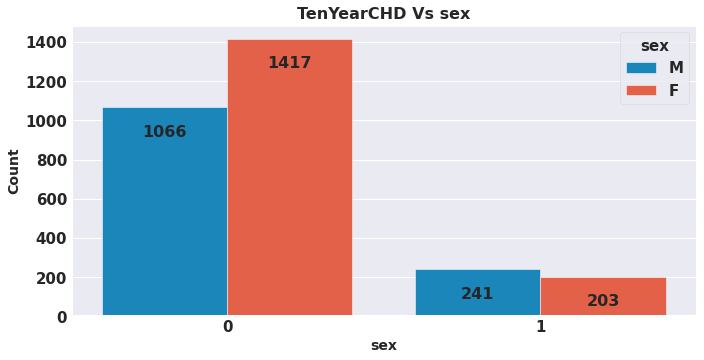

In [28]:

#plotting of Coronary heart diseases for Male and Female
plt.figure(figsize=(10,5))
ax = sns.countplot(x='TenYearCHD', hue='sex', data=df)
plt.title('TenYearCHD Vs sex', size=16)
plt.xlabel('sex', size=14)
plt.ylabel('Count', size=14)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',  (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=16)

plt.show()

*  TenYearCHD prediction graph with respect to Sex(male or female) and count of total person.
* Male are in blue color and female are in red color

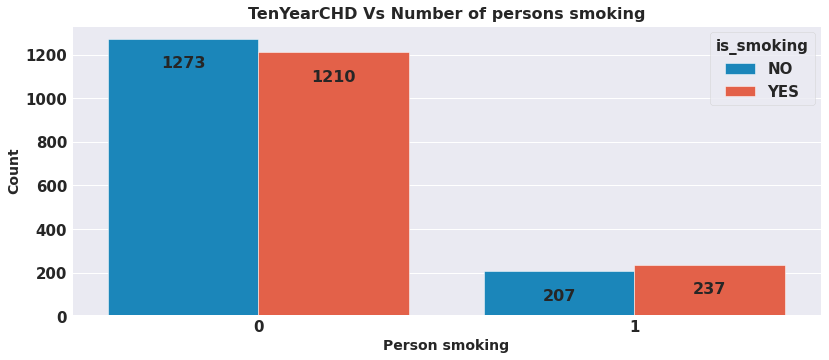

In [29]:
#plotting of CHD for number of smoking human being -
plt.figure(figsize=(12,5))
ax = sns.countplot(x='TenYearCHD', hue='is_smoking', data=df)
plt.title('TenYearCHD Vs Number of persons smoking', size=16)
plt.xlabel('Person smoking', size=14)
plt.ylabel('Count', size=14)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',  (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=16)

plt.show()

* Analyze the relationship between TenYearCHD and Person Smoking.
* No are in Blue and Yes are in Red color.  

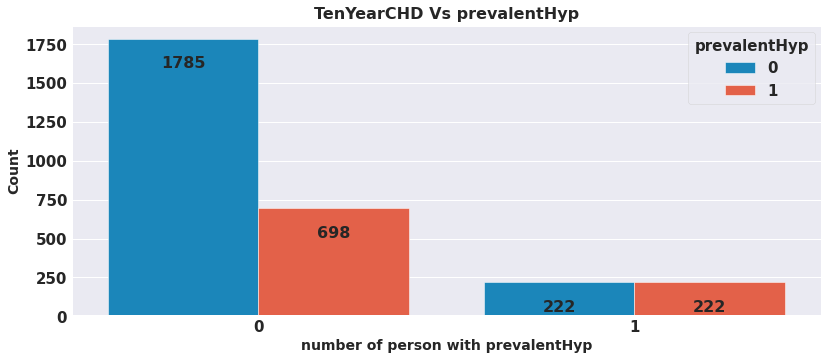

In [30]:
#plotting of CHD to check whether or not the patient was hypertensive
plt.figure(figsize=(12,5))
ax = sns.countplot(x='TenYearCHD', hue='prevalentHyp', data=df)
plt.title('TenYearCHD Vs prevalentHyp', size=16)
plt.xlabel('number of person with prevalentHyp', size=14)
plt.ylabel('Count', size=14)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',  (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=16)

plt.show()

* Analyze the relationship between Count of person and Prevalent Hypertensive to represent  the relationship.

#### **value counts of male and female**

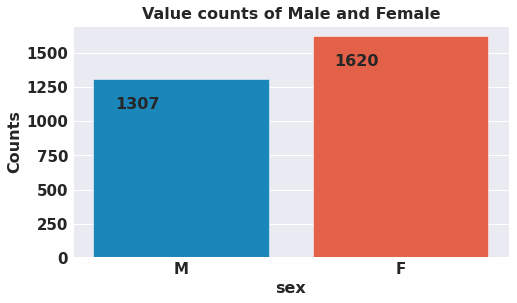

In [31]:
# value counts of male and female
plt.figure(figsize=(7,4))
ch = sns.countplot(df['sex'])
plt.xlabel('sex', size=16)
plt.ylabel('Counts', size=16)
plt.title('Value counts of Male and Female', size=16)
for p in ch.patches:
    ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=16)
plt.show()

*  Value of Count of person(Male and Female).
*  Male are in blue color and Red Are in Female.

#### **value counts of person smoking**

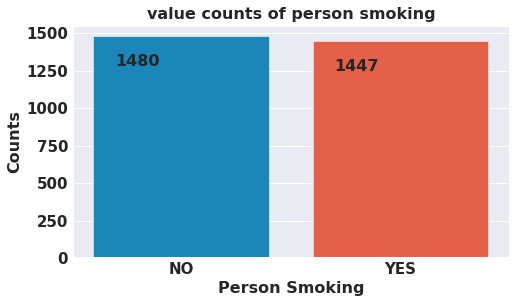

In [32]:
# value counts of person smoking
plt.figure(figsize=(7,4))
ch = sns.countplot(df['is_smoking'])
plt.xlabel('Person Smoking', size=16)
plt.ylabel('Counts', size=16)
plt.title('value counts of person smoking', size=16)
for p in ch.patches:
    ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=16)
plt.show()

* Analyze the person smoking with repect to Count and Person Smoking data.

#### **Value counts of patient was on blood pressure medication**

In [33]:
# value counts of patient was on blood pressure medication
BPMeds = df['BPMeds'].dropna(0).value_counts()
BPMeds

0.0    2839
1.0      88
Name: BPMeds, dtype: int64

([<matplotlib.patches.Wedge at 0x7f77cbe8d850>,
 [Text(-0.6373922057404507, -0.8965105554656471, '0.0'),
  Text(0.6953370375618967, 0.9780114540201692, '1.0')],
 [Text(-0.34766847585842764, -0.48900575752671654, '97.0%'),
  Text(0.4056132719111064, 0.5705066815117654, '3.0%')])

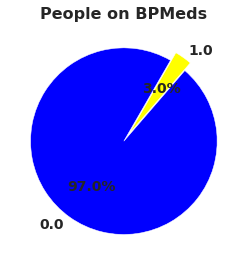

In [34]:
plt.rcParams['figure.figsize'] = 4,4
labels = df['BPMeds'].value_counts().index.tolist()
sizes = df['BPMeds'].value_counts().tolist()
plt.title('People on BPMeds', size=16)
colors = ['blue','yellow']
explode = (0, 0.1)
plt.pie(sizes, labels=labels,explode = (0, 0.1), colors=colors,autopct='%1.1f%%' ,startangle=60,textprops={'fontsize': 14})

*  Whether or not the patient was on blood pressure medication

#### **value counts of patient previously had a stroke**

In [35]:
#value counts of patient previously had a stroke
prevalentStroke = df['prevalentStroke'].value_counts()
prevalentStroke

0    2909
1      18
Name: prevalentStroke, dtype: int64

([<matplotlib.patches.Wedge at 0x7f77cbe5ac90>,
 [Text(-0.5683006948333067, -0.9418249944931282, '0'),
  Text(0.6199644214188407, 1.0274454322127293, '1')],
 [Text(-0.3099821971818036, -0.5137227242689789, '99.4%'),
  Text(0.36164591249432365, 0.5993431687907588, '0.6%')])

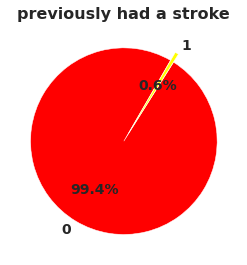

In [36]:
plt.rcParams['figure.figsize'] = 4,4
labels = df['prevalentStroke'].value_counts().index.tolist()
sizes = df['prevalentStroke'].value_counts().tolist()
plt.title('previously had a stroke', size=16)
colors = ['red','yellow']
explode = (0, 0.1)
plt.pie(sizes, labels=labels,explode = (0, 0.1), colors=colors,autopct='%1.1f%%' ,startangle=60,textprops={'fontsize': 14})

* whether or not the patient was on blood pressure medication

#### **value counts of patient was hypertensive**

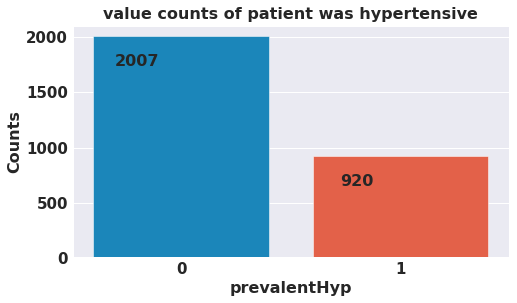

In [37]:
# value counts of patient was hypertensive
plt.figure(figsize=(7,4))
ch = sns.countplot(df['prevalentHyp'])
plt.xlabel('prevalentHyp', size=16)
plt.ylabel('Counts', size=16)
plt.title('value counts of patient was hypertensive', size=16)
for p in ch.patches:
    ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=16)
plt.show()

* whether or not the patient was on hypertensive.

####**value counts of patient had diabetes**

In [38]:
#value counts of patient had diabetes
diabetes = df['diabetes'].value_counts()
diabetes

0    2848
1      79
Name: diabetes, dtype: int64

([<matplotlib.patches.Wedge at 0x7f77cbf15490>,
 [Text(-0.6287024474481075, -0.9026257433580984, '0'),
  Text(0.6858572903044546, 0.9846825769435708, '1')],
 [Text(-0.3429286076989677, -0.49234131455896274, '97.3%'),
  Text(0.40008341934426517, 0.5743981698837496, '2.7%')])

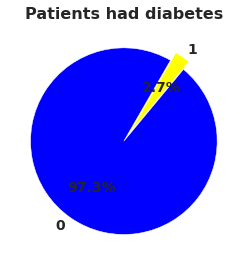

In [39]:
plt.rcParams['figure.figsize'] = 4,4
labels = df['diabetes'].value_counts().index.tolist()
sizes = df['diabetes'].value_counts().tolist()
plt.title('Patients had diabetes', size=16)
colors = ['blue','yellow']
explode = (0, 0.1)
plt.pie(sizes, labels=labels,explode = (0, 0.1), colors=colors,autopct='%1.1f%%' ,startangle=60,textprops={'fontsize': 14})

* whether or not the patient was on diastolic blood pressure 

####**Value Count of Age**

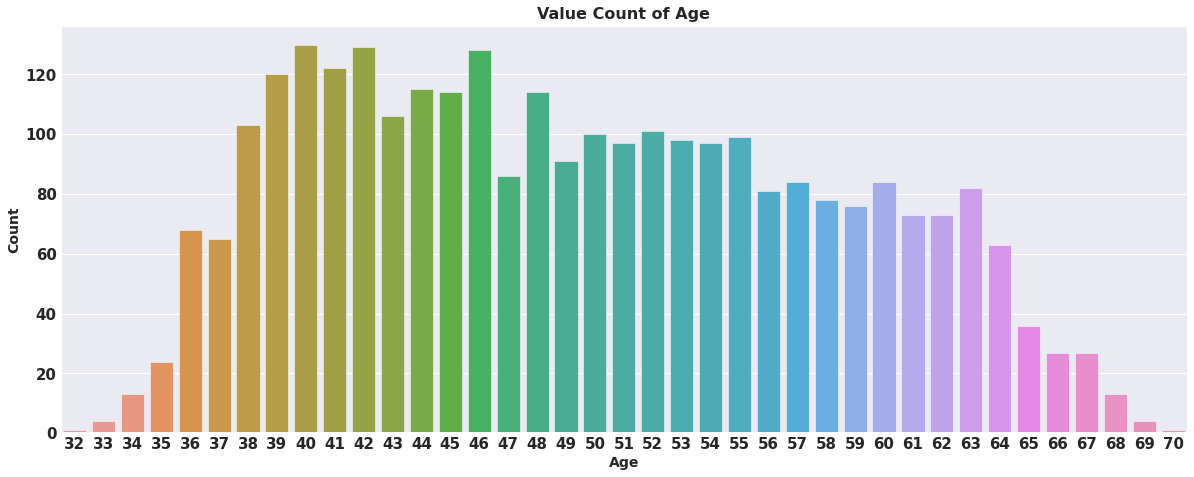

In [40]:
#value counts of age feature
plt.figure(figsize=(18,7))
sns.countplot(data=df,x='age')
plt.title('Value Count of Age', size=16)
plt.xlabel('Age', size=14)
plt.ylabel('Count', size=14)
plt.show()

#### **Age Vs Person Smoking**

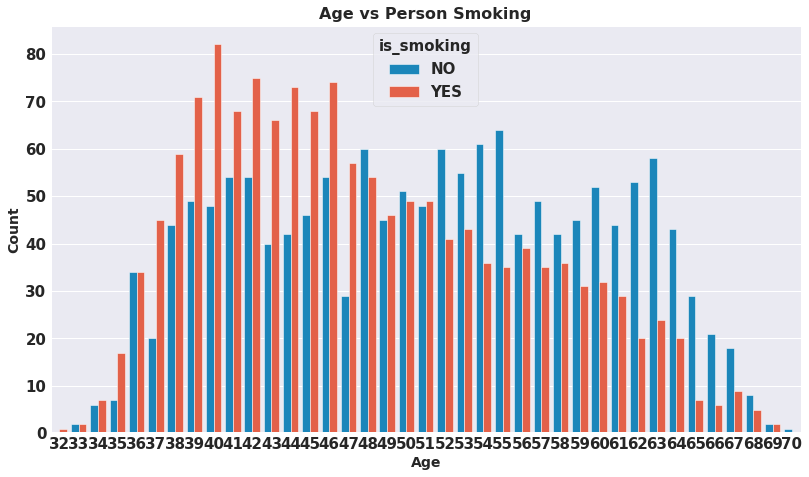

In [41]:
#visualization of person smoking on the basis of age
plt.figure(figsize=(12,7))
sns.countplot(data=df, x='age', hue='is_smoking')
plt.title('Age vs Person Smoking', size=16)
plt.xlabel('Age', size=14)
plt.ylabel('Count', size=14)
plt.show()

#### **Age vs.Heart Rate for Coronary Heart Disease**

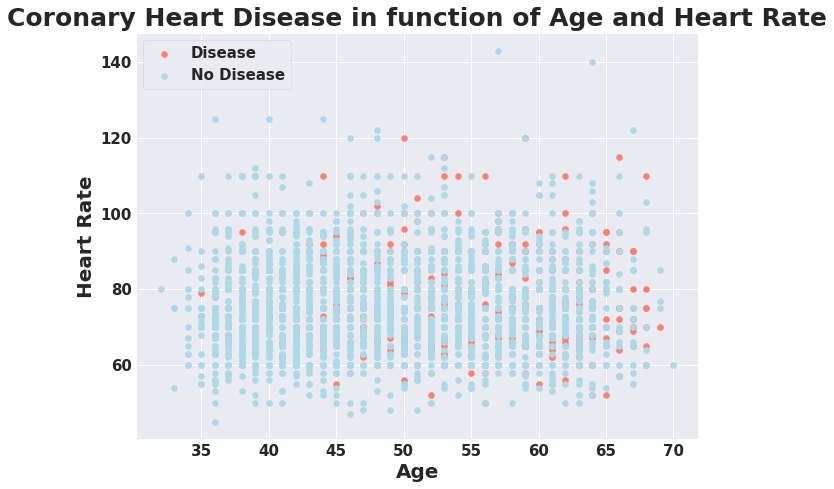

In [42]:
# Create another figure
plt.figure(figsize=(9, 7))

# Scatter with postivie examples
plt.scatter(df.age[df.TenYearCHD==1],
            df.heartRate[df.TenYearCHD==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.TenYearCHD==0],
            df.heartRate[df.TenYearCHD==0],
            c="lightblue")

# Add some helpful info
plt.title("Coronary Heart Disease in function of Age and Heart Rate")
plt.xlabel("Age")
plt.ylabel("Heart Rate")
plt.legend(["Disease", "No Disease"]);

# **Data Preparation**

#### **Let's observe the correlation in dataset**


In [43]:
corr_matrix = df.corr()
corr_matrix

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
age,1.000000,-0.161238,-0.184110,0.138570,0.049756,0.313543,0.111085,0.281156,0.405238,0.231322,0.141001,0.013947,0.108882,0.234423
education,-0.161238,1.000000,0.015506,-0.023534,-0.027410,-0.082675,-0.054464,-0.011575,-0.130417,-0.056034,-0.131304,-0.061501,-0.034099,-0.062442
cigsPerDay,-0.184110,0.015506,1.000000,-0.036866,-0.047461,-0.080570,-0.048959,-0.026606,-0.105104,-0.067483,-0.095310,0.055770,-0.064029,0.059797
BPMeds,0.138570,-0.023534,-0.036866,1.000000,0.114107,0.260039,0.069443,0.098210,0.280788,0.206209,0.088962,0.014681,0.069125,0.092868
prevalentStroke,0.049756,-0.027410,-0.047461,0.114107,1.000000,0.059703,0.013866,0.002418,0.061712,0.059594,0.029168,-0.018617,0.021427,0.052014
prevalentHyp,0.313543,-0.082675,-0.080570,0.260039,0.059703,1.000000,0.082510,0.162100,0.699240,0.612037,0.304790,0.154375,0.086143,0.169136
diabetes,0.111085,-0.054464,-0.048959,0.069443,0.013866,0.082510,1.000000,0.069232,0.108990,0.058115,0.090249,0.046822,0.617189,0.100006
totChol,0.281156,-0.011575,-0.026606,0.098210,0.002418,0.162100,0.069232,1.000000,0.210685,0.165101,0.113206,0.091487,0.066703,0.106473
sysBP,0.405238,-0.130417,-0.105104,0.280788,0.061712,0.699240,0.108990,0.210685,1.000000,0.783586,0.340782,0.180690,0.134609,0.217419
diaBP,0.231322,-0.056034,-0.067483,0.206209,0.059594,0.612037,0.058115,0.165101,0.783586,1.000000,0.391291,0.173350,0.074630,0.139005


(14.5, -0.5)

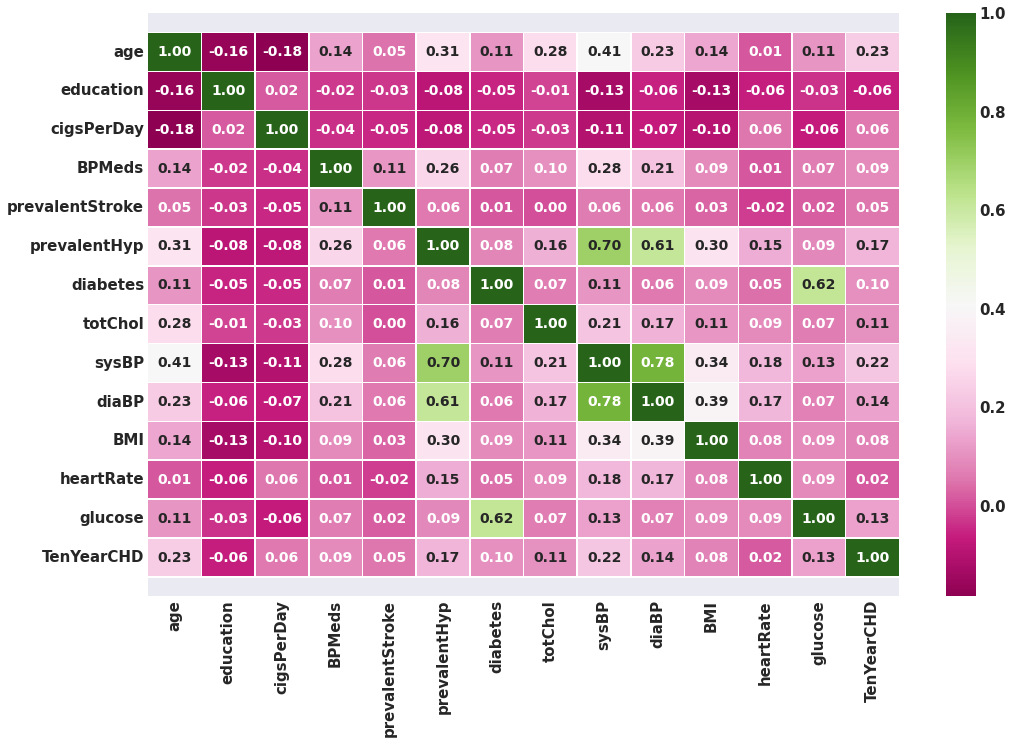

In [44]:

# Let's make our correlation matrix a little prettier
#visualization of the correlation in the heatmap
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="PiYG");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [45]:
# Correlation of variables with Target Variable-
print(df.corr()["TenYearCHD"].abs().sort_values(ascending=False))

TenYearCHD         1.000000
age                0.234423
sysBP              0.217419
prevalentHyp       0.169136
diaBP              0.139005
glucose            0.133286
totChol            0.106473
diabetes           0.100006
BPMeds             0.092868
BMI                0.075950
education          0.062442
cigsPerDay         0.059797
prevalentStroke    0.052014
heartRate          0.018747
Name: TenYearCHD, dtype: float64


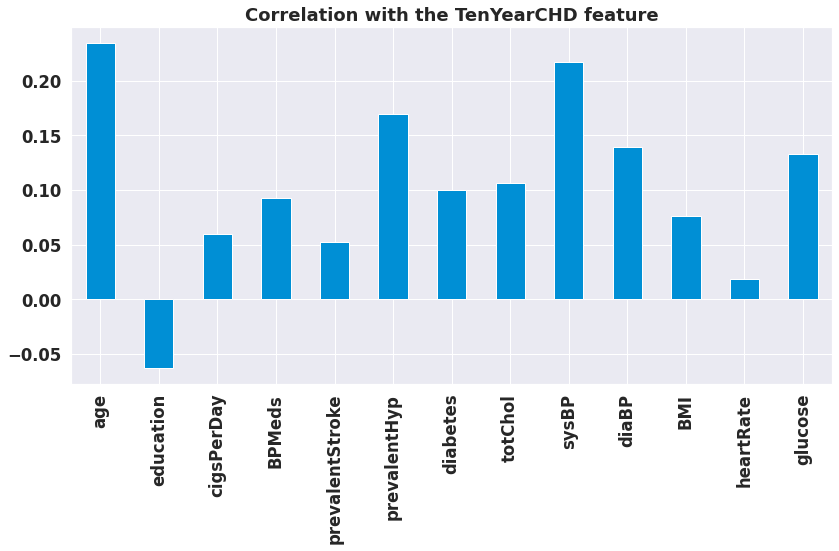

In [46]:
# Visualize the Correlation of variables with Target Variable-
sns.set_context('notebook',font_scale = 1.5)
df.drop('TenYearCHD', axis=1).corrwith(df.TenYearCHD).plot(kind='bar', grid=True, figsize=(12,8), 
                                                        title="Correlation with the TenYearCHD feature")
plt.tight_layout()


*   HeartRate and prevalentStroke are the 
lowest correlated with the target variable.
*   All other variables have a significant correlation with the target i.e TenYearCHD variable





# **Data Transformation**

**After exploring the dataset, we observed that we need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models. First, we will use the get_dummies method to create dummy columns for categorical variables**

In [47]:
# Adding pulse pressure as a column
df['pulsePressure'] = df['sysBP'] - df['diaBP']
# Dropping the systolic and diastolic BP columns
df.drop(['sysBP','diaBP'], axis = 1, inplace = True)
# Dropping the 'is_smoking' column
df.drop('is_smoking', axis = 1, inplace = True)

In [48]:
# To get the Categorical Variables
categorical_val = []
continous_val = []
for column in df.columns:
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)
categorical_val

['education',
 'sex',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'TenYearCHD']

##**One Hot Encoding**
* One hot encoding is one method of converting data to prepare it for an algorithm and get a better prediction. With one-hot, we convert each categorical value into a new categorical column and assign a binary value of 1 or 0 to those columns. Each integer value is represented as a binary vector.

In [49]:
# Creating dummy variables-
categorical_val.remove('TenYearCHD')
df=pd.get_dummies(df, columns = categorical_val)

In [50]:
df.head()

,age,cigsPerDay,totChol,BMI,heartRate,glucose,TenYearCHD,pulsePressure,education_1.0,education_2.0,...,sex_F,sex_M,BPMeds_0.0,BPMeds_1.0,prevalentStroke_0,prevalentStroke_1,prevalentHyp_0,prevalentHyp_1,diabetes_0,diabetes_1
1,36,0.0,212.0,29.77,72.0,75.0,0,70.0,0,0,...,0,1,1,0,1,0,0,1,1,0
2,46,10.0,250.0,20.35,88.0,94.0,0,45.0,1,0,...,1,0,1,0,1,0,1,0,1,0
3,50,20.0,233.0,28.26,68.0,94.0,1,70.0,1,0,...,0,1,1,0,1,0,0,1,1,0
4,64,30.0,241.0,26.42,70.0,77.0,0,51.5,1,0,...,1,0,1,0,1,0,1,0,1,0
5,61,0.0,272.0,32.80,85.0,65.0,1,61.0,0,0,...,1,0,1,0,1,0,0,1,1,0


In [51]:
print(df.columns)

Index(['age', 'cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose',
       'TenYearCHD', 'pulsePressure', 'education_1.0', 'education_2.0',
       'education_3.0', 'education_4.0', 'sex_F', 'sex_M', 'BPMeds_0.0',
       'BPMeds_1.0', 'prevalentStroke_0', 'prevalentStroke_1',
       'prevalentHyp_0', 'prevalentHyp_1', 'diabetes_0', 'diabetes_1'],
      dtype='object')


In [52]:
df.TenYearCHD.value_counts()

0    2483
1     444
Name: TenYearCHD, dtype: int64

#### **As there exits a clear imbalance in the classes. Hence, we will use SMOTE to oversample the classes which are in less number**

In [53]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE

In [54]:
#Synthetic Minority Oversampling Technique
# transform the dataset
# Creating an instance for SMOTE
oversample = SMOTE()
X = df.drop('TenYearCHD', axis=1)
y = df.TenYearCHD

In [55]:
# The rows and columns of X and y
print(f'X has {X.shape[0]} rows and {X.shape[1]} columns')
print(f'y has {y.shape[0]} rows')

X has 2927 rows and 21 columns
y has 2927 rows


In [56]:
# Using SMOTE to oversample
X, y = oversample.fit_resample(X, y)

In [57]:
# Counts of each classes after oversampling
print(list(y).count(1))
print(list(y).count(0))

2483
2483


In [58]:
# Rows in the dataset after oversampling
print(f'Number of rows in X is {len(X)}')
print(f'Number of rows in y is {len(y)}')

Number of rows in X is 4966
Number of rows in y is 4966


##**Scaling the data for model fitting-**

#### StandardScaler: To scale all the features, so that the Machine Learning model better adapts to the dataset

In [59]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose', 'pulsePressure']
df[col_to_scale] = s_sc.fit_transform(df[col_to_scale])
df.head()

,age,cigsPerDay,totChol,BMI,heartRate,glucose,TenYearCHD,pulsePressure,education_1.0,education_2.0,...,sex_F,sex_M,BPMeds_0.0,BPMeds_1.0,prevalentStroke_0,prevalentStroke_1,prevalentHyp_0,prevalentHyp_1,diabetes_0,diabetes_1
1,-1.571403,-0.767017,-0.563362,0.962052,-0.324858,-0.287701,0,1.362151,0,0,...,0,1,1,0,1,0,0,1,1,0
2,-0.408034,0.074680,0.288548,-1.319002,1.011910,0.500588,0,-0.317045,1,0,...,1,0,1,0,1,0,1,0,1,0
3,0.057314,0.916378,-0.092570,0.596406,-0.659050,0.500588,1,1.362151,1,0,...,0,1,1,0,1,0,0,1,1,0
4,1.686031,1.758075,0.086780,0.150850,-0.491954,-0.204723,0,0.119546,1,0,...,1,0,1,0,1,0,1,0,1,0
5,1.337020,-0.767017,0.781759,1.695767,0.761266,-0.702590,1,0.757641,0,0,...,1,0,1,0,1,0,0,1,1,0


## **Implementation of Models**

#### **To get the metrics of the model**

In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

## **Train and Test data sets**

In [61]:
# Importing packages to split data into train and test
from sklearn.model_selection import train_test_split

X = df.drop('TenYearCHD', axis=1)
y = df.TenYearCHD

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

* Now we've got our data split into training and test sets, it's time to build a machine learning model.

* We'll train it (find the patterns) on the training set.

* And we'll test it (use the patterns) on the test set

## **Logistic Regression**
* Logistic regression is an example of supervised learning. It is used to calculate or predict the probability of a binary (yes/no) event occurring. 

In [62]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 85.94%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.860534    0.769231  0.859375     0.814882      0.847070
recall        0.996564    0.066225  0.859375     0.531394      0.859375
f1-score      0.923567    0.121951  0.859375     0.522759      0.805360
support    1746.000000  302.000000  0.859375  2048.000000   2048.000000
_______________________________________________
Confusion Matrix: 
 [[1740    6]
 [ 282   20]]

Test Result:
Accuracy Score: 84.87%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.848730    0.846154  0.848692    0.847442      0.848314
recall       0.997286    0.077465  0.848692    0.537376      0.848692
f1-score     0.917031    0.141935  0.848692    0.529483      0.791816
support    737.000000  142.000000  0.848692  879.

In [63]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.9375,84.86917


## **K-nearest neighbors**
* The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point

In [64]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 86.67%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.876341    0.659341  0.866699     0.767841      0.844342
recall        0.982245    0.198675  0.866699     0.590460      0.866699
f1-score      0.926276    0.305344  0.866699     0.615810      0.834713
support    1746.000000  302.000000  0.866699  2048.000000   2048.000000
_______________________________________________
Confusion Matrix: 
 [[1715   31]
 [ 242   60]]

Test Result:
Accuracy Score: 82.82%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.845519    0.354839  0.828214    0.600179      0.766251
recall       0.972863    0.077465  0.828214    0.525164      0.828214
f1-score     0.904732    0.127168  0.828214    0.515950      0.779119
support    737.000000  142.000000  0.828214  879.

In [65]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.937500,84.869170
1,K-nearest neighbors,86.669922,82.821388


## **Support Vector machine**
* SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. 

In [66]:
from sklearn.svm import SVC


svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 85.99%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.858829    1.000000  0.859863     0.929415      0.879646
recall        1.000000    0.049669  0.859863     0.524834      0.859863
f1-score      0.924054    0.094637  0.859863     0.509346      0.801747
support    1746.000000  302.000000  0.859863  2048.000000   2048.000000
_______________________________________________
Confusion Matrix: 
 [[1746    0]
 [ 287   15]]

Test Result:
Accuracy Score: 83.85%
_______________________________________________
CLASSIFICATION REPORT:
                    0      1  accuracy   macro avg  weighted avg
precision    0.838453    0.0  0.838453    0.419226      0.703003
recall       1.000000    0.0  0.838453    0.500000      0.838453
f1-score     0.912129    0.0  0.838453    0.456064      0.764777
support    737.000000  142.0  0.838453  879.000000    879.000000
____

In [67]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.937500,84.869170
1,K-nearest neighbors,86.669922,82.821388
2,Support Vector Machine,85.986328,83.845279


## **Decision Tree Classifier**
* Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In [68]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision     1.0    1.0       1.0        1.0           1.0
recall        1.0    1.0       1.0        1.0           1.0
f1-score      1.0    1.0       1.0        1.0           1.0
support    1746.0  302.0       1.0     2048.0        2048.0
_______________________________________________
Confusion Matrix: 
 [[1746    0]
 [   0  302]]

Test Result:
Accuracy Score: 77.36%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.862534    0.291971  0.773606    0.577252      0.770361
recall       0.868385    0.281690  0.773606    0.575038      0.773606
f1-score     0.865450    0.286738  0.773606    0.576094      0.771960
support    737.000000  142.000000  0.773606  879.000000    879.000000
______________________________________

In [69]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.937500,84.869170
1,K-nearest neighbors,86.669922,82.821388
2,Support Vector Machine,85.986328,83.845279
3,Decision Tree Classifier,100.000000,77.360637


* Model with respect to traing and testing accuracy

## **ROC Curve**
* The ROC (receiver operating characteristics) curve (Fawcett 2005) is another measure of accuracy. The ROC curve is a plot of the true positive rate (TPR, sensitivity) versus the false positive rate (FPR, 1 - specificity) for a set of thresholds. By default, the threshold for predicting the default classification is 0.50, but it could be any threshold. 

In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
# Creating a dictionary for models

In [71]:
# Creating a dictionary for models
models = {'Logistic Regression' : LogisticRegression(),
          'KNN' : KNeighborsClassifier(),
          'SVC' : SVC(probability=True),
          'Decision Tree' :DecisionTreeClassifier(random_state=42)}

In [72]:
# Creating a function for model building
def model_build(X_train, y_train, X_test, y_test, model_dict):
  ''' Returns a dataframe with model name and accuracy scores, train confusion matrix, test confusion matrix and the values 
  for the roc curve '''
  
  # Creating a dataframe
  model_df = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision',
                                     'Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC'])
  
  # Creating necessary dictionaries
  train_confusion_matrix = {}  
  test_confusion_matrix = {}  
  curve = {}
  
  
  # Model building
  for n, m in model_dict.items():
    model = m
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    test_probs = model.predict_proba(X_test)
    test_probs = test_probs[:,1]

    # Evaluation
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    train_precision = precision_score(y_train, train_preds)
    test_precision = precision_score(y_test, test_preds)
    train_recall = recall_score(y_train, train_preds)
    test_recall = recall_score(y_test, test_preds)
    train_roc_auc = roc_auc_score(y_train, train_preds)
    test_roc_auc = roc_auc_score(y_test, test_preds)

     # Updating the dataframe for each iteration
    model_df = model_df.append({'Model': n,
                               'Train Accuracy' : train_accuracy,
                               'Test Accuracy': test_accuracy,
                               'Train Precision' : train_precision,
                               'Test Precision' : test_precision,
                               'Train Recall' : train_recall,
                               'Test Recall' : test_recall,
                               'Train ROC AUC' : train_roc_auc,
                               'Test ROC AUC' : test_roc_auc}, ignore_index = True)
    
    # Updating the dictionary for each iteration
    train_confusion_matrix[n] = confusion_matrix(y_train, train_preds)
    test_confusion_matrix[n] = confusion_matrix(y_test, test_preds)

    # ROC Curve values
    fpr, tpr, _ = roc_curve(y_test, test_probs)
    curve[n] = (fpr,tpr)

    
  return model_df, train_confusion_matrix, test_confusion_matrix, curve

In [73]:
# Using the model function to understand the scores of different models
model_table, train_cm, test_cm, curve= model_build(X_train, y_train, X_test, y_test, models)

In [74]:

# Models and their scores
model_table

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC AUC,Test ROC AUC
0,Logistic Regression,0.859863,0.848692,0.800000,0.846154,0.066225,0.077465,0.531681,0.537376
1,KNN,0.866699,0.828214,0.659341,0.354839,0.198675,0.077465,0.590460,0.525164
2,SVC,0.858398,0.838453,1.000000,0.000000,0.039735,0.000000,0.519868,0.500000
3,Decision Tree,1.000000,0.773606,1.000000,0.291971,1.000000,0.281690,1.000000,0.575038


Text(0.5, 1.0, 'ROC CURVE')

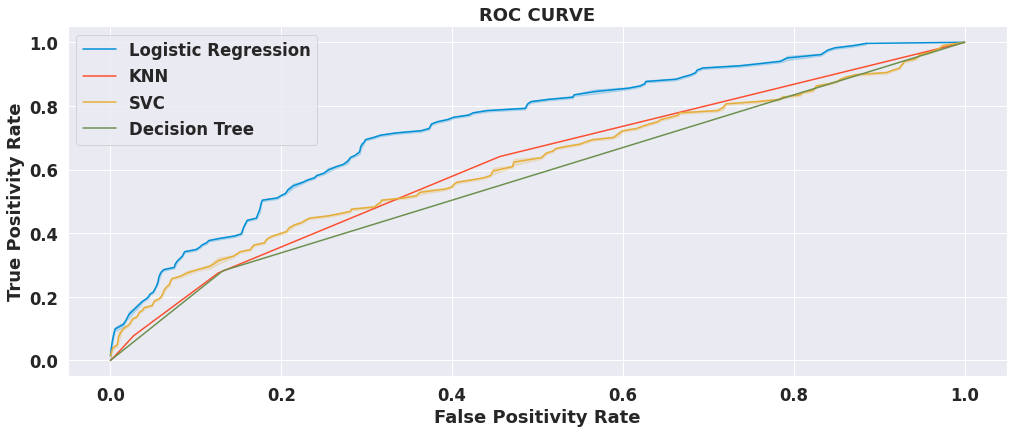

In [75]:
# Plotting ROC Curve for all the models
plt.figure(figsize=(15,6))
for name, value in curve.items():
  sns.lineplot(x = value[0], y = value[1], label = name)
plt.xlabel('False Positivity Rate')
plt.ylabel('True Positivity Rate')
plt.title('ROC CURVE')

The more that the curve hugs the top left corner of the plot, the better the model does at classifying the data into categories

## **Hyperparameter Optimization**

#### **K-nearest neighbors Hyperparameter Tuning**

In [76]:
train_score = []
test_score = []
neighbors = range(1, 30)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_score.append(accuracy_score(y_train, model.predict(X_train)))

Maximum KNN score on the test data: 100.00%


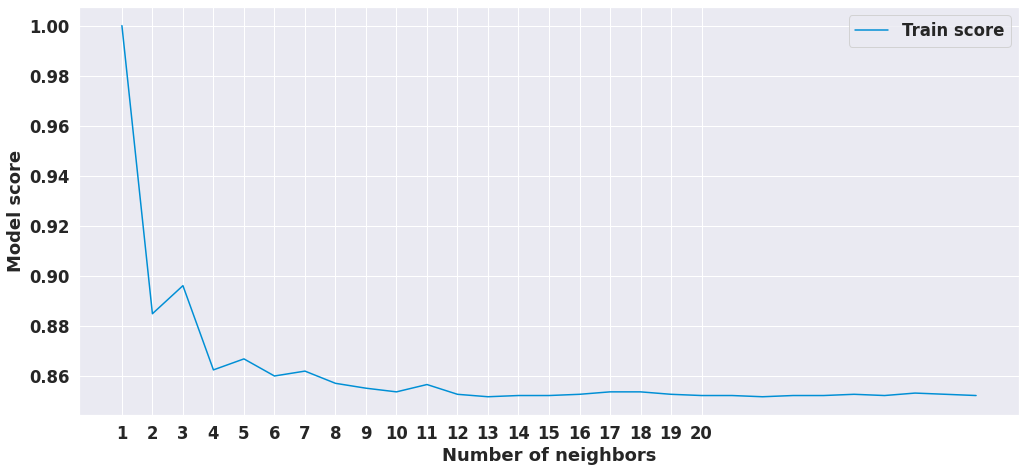

In [77]:
plt.figure(figsize=(15, 7))

plt.plot(neighbors, train_score, label="Train score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(train_score)*100:.2f}%")

In [78]:
knn_clf = KNeighborsClassifier(n_neighbors=27)
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 85.30%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.853647    0.600000  0.853027     0.726823      0.816244
recall        0.998855    0.009934  0.853027     0.504394      0.853027
f1-score      0.920560    0.019544  0.853027     0.470052      0.787695
support    1746.000000  302.000000  0.853027  2048.000000   2048.000000
_______________________________________________
Confusion Matrix: 
 [[1744    2]
 [ 299    3]]

Test Result:
Accuracy Score: 84.07%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.840365    1.000000  0.840728    0.920182      0.866153
recall       1.000000    0.014085  0.840728    0.507042      0.840728
f1-score     0.913259    0.027778  0.840728    0.470518      0.770212
support    737.000000  142.000000  0.840728  879.

In [79]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100
tuning_results_df = pd.DataFrame(data=[["Tuned K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned K-nearest neighbors,85.302734,84.07281


In [80]:
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.937500,84.869170
1,K-nearest neighbors,86.669922,82.821388
2,Support Vector Machine,85.986328,83.845279
3,Decision Tree Classifier,100.000000,77.360637


# **Conclusion**

* Logistic Regression, K Nearest Neighbors, Support Vector Machines, and Decision Tree Classification Models have been implemented. 
From these above models, we found ANN to be the best  model compared to the other model 
* In Hyperparameter tuning ,we observed that K-Nearest Neighbors accuracy has improved which shows that KNN (with Hyperparameter Tuning) is the best fitted model for Coronary Heart Disease dataset.
* Training Accuracy = 85.30 & Testing Accuracy = 84.07 
* We can also run random forest classifiers and XGBoost models for improved future coronary artery disease model fitting. By consulting the medical staff, the characteristics can be analyzed in an appropriate and necessary way to address the causes and consequences of the disease




